In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#pemanggilan data
data = pd.read_csv("/content/drive/MyDrive/produk_elektronik.csv")

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data.head()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,1,Produk_1,Smartwatch,746.0,4.2,273.0,Japan
1,2,Produk_2,Headphone,241.0,3.5,239.0,Canada
2,3,Produk_3,Tablet,810.0,3.8,209.0,Canada
3,4,Produk_4,Headphone,303.0,3.2,59.0,South Korea
4,5,Produk_5,Headphone,252.0,3.7,76.0,South Korea


In [16]:
data.tail(5)

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
545,546,Produk_546,Laptop,496.0,3.9,19.0,China
546,547,Produk_547,Headphone,628.0,4.7,414.0,USA
547,548,Produk_548,Tablet,465.0,4.3,393.0,India
548,549,Produk_549,Laptop,495.0,3.1,311.0,Germany
549,550,Produk_550,Tablet,388.0,4.3,240.0,Germany


In [17]:
#melihat statistika deskriptif
data.describe()

,produk_id,harga,rating,jumlah_ulasan
count,550.000000,520.000000,500.000000,530.000000
mean,275.500000,565.715385,4.005600,259.671698
std,158.915596,625.886725,0.571052,142.655380
min,1.000000,-213.000000,3.000000,12.000000
25%,138.250000,374.000000,3.500000,139.000000
50%,275.500000,516.000000,4.000000,262.500000
75%,412.750000,656.250000,4.500000,390.750000
max,550.000000,8341.000000,5.000000,499.000000


1. a. Download dataset produk_elektronik.csv yang ada pada link berikut.
https://bit.ly/dataprodukelektronik  

  b. Tampilkan informasi tipe data setiap kolom dan cek apakah ada missing values.

  Jawab:
  Berdasarkan output di bawah ini, terdapat missing values. Hal ini dapat diketahui dari adanya beberapa kolom yang memiliki jumlah baris kurang dari jumlah maksimal baris untuk setiap kolomnya, yaitu: 550 baris.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          520 non-null    float64
 4   rating         500 non-null    float64
 5   jumlah_ulasan  530 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 7 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak:  550 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 550, yaitu kolom: harga, rating, dan jumlah_ulasan, maka akan dilakukan proses identifikasi lebih lanjut.



# Deteksi Missing value

In [19]:
data.isnull()

,produk_id,nama_produk,kategori,harga,rating,jumlah_ulasan,negara_asal
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


2a.Cek missing values pada dataset. Berapa jumlah missing values di setiap kolom?

Jawab:

Jumlah missing values di setiap kolom dapat dilihat pada hasil output di bawah ini:

In [20]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,30
rating,50
jumlah_ulasan,20
negara_asal,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom harga, rating, dan jumlah_ulasan. Jumlah missing values di kolom harga, rating, dan jumlah_ulasan berturut-turut adalah 30, 50, dan 20.

In [23]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

100

Sedangkan jumlah missing values di seluruh dataset adalah sebanyak 100.

2b. Jelaskan bagaimana keberadaan missing values dapat memengaruhi analisis data.
Jawab:

Missing values memiliki dampak terhadap terhadap analisis data yaitu:
1. mengurangi keakuratan data.
2. menimbulkan error.
3. menyebabkan distorsi dalam statistik.
4. menyulitkan visualisasi data.

# HANDLING MISSING VALUE

Dalam Machine Learning, missing values adalah masalah umum yang harus ditangani sebelum model dapat digunakan. Ada beberapa metode untuk menangani missing values, tergantung pada jenis data dan karakteristik distribusinya.

2c. Tentukan metode yang paling sesuai untuk menangani missing values di setiap
kolom. Berikan alasan pemilihan metode tersebut.

Jawab:

Metode yang digunakan untuk setiap kolom:


1.   Harga

 Pada kolom harga, produk elektronik bisa sangat bervariasi (misalnya, ada produk murah dan mahal). Mean tidak ideal karena dapat terpengaruh oleh outlier (misalnya, produk flagship dengan harga tinggi bisa menaikkan rata-rata). Oleh karena itu, median lebih aman karena mengambil nilai tengah dan tidak terpengaruh oleh harga ekstrem.
   
2.   Rating

  Pada kolom rating, rating biasanya berada dalam skala 1 - 5, jadi nilainya tidak memiliki outlier ekstrem yang dapat merusak rata-rata. Mean cocok karena rating umumnya terdistribusi normal dalam suatu kategori produk. Median juga dapat digunakan, tetapi mean lebih umum dalam kasus rating.

3. Jumlah_Ulasan

  Pada kolom jumlah_ulasan, jumlah ulasan dapat sangat bervariasi, misalnya ada produk dengan ratusan atau ribuan ulasan, sementara yang lain hanya memiliki sedikit ulasan.
  Mean tidak ideal karena bisa dipengaruhi oleh produk yang viral atau sangat populer.
  Median lebih masuk akal karena menunjukkan jumlah ulasan yang lebih representatif untuk sebagian besar produk.

2d. Tangani missing values dengan metode yang sesuai.

Jawab:

## 1. HARGA

In [24]:
#melihat isi dalam kolom harga
data['harga'].unique()

array([ 7.460e+02,  2.410e+02,  8.100e+02,  3.030e+02,  2.520e+02,
        3.350e+02,  8.900e+02,  4.910e+02,  6.050e+02,  4.630e+02,
        4.810e+02,  3.980e+02,  5.100e+02,  5.980e+02,  8.350e+02,
        1.250e+02,  8.220e+02,  4.260e+02,  3.900e+02,  7.080e+02,
        5.450e+02,        nan,  5.720e+02,  7.280e+02,  6.710e+02,
        3.740e+02,  2.310e+02,  4.340e+02,  1.150e+03,  3.310e+02,
        5.780e+02,  4.750e+02,  4.590e+02,  9.040e+02,  4.970e+02,
        5.400e+02,  3.390e+02,  2.110e+02,  8.620e+02,  5.800e+02,
        5.180e+02,  5.160e+02,  4.480e+02,  7.360e+02,  2.280e+02,
        1.830e+02,  5.150e+02,  7.120e+02,  5.470e+02,  4.360e+02,
        5.910e+02,  5.370e+02,  6.650e+02,  7.650e+02,  3.090e+02,
        4.290e+02,  2.960e+02,  6.660e+02,  3.550e+02,  1.240e+02,
        3.850e+02,  2.010e+02,  8.180e+02,  5.940e+02,  6.290e+02,
        6.070e+02,  6.680e+02,  7.260e+02,  3.920e+02,  2.160e+02,
        3.300e+02,  4.900e+02, -1.200e+01,  1.200e+02,  6.190e

In [25]:
#jumlah missing value
np.sum(data['harga'].isnull())

30

In [28]:
#mengisi missing value
data['harga']=data['harga'].fillna(data['harga'].median())

In [29]:
#jumlah missing value
np.sum(data['harga'].isnull())

0

## 2. RATING

In [30]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2, 3.5, 3.8, 3.2, 3.7, 4. , 4.5, 3. , 3.9, 3.6, 4.7, 4.4, nan,
       3.1, 4.9, 4.6, 5. , 4.8, 4.3, 3.4, 4.1, 3.3])

In [31]:
#jumlah missing value
np.sum(data['rating'].isnull())

50

In [32]:
#mengisi missing value
data['rating']=data['rating'].fillna(data['rating'].mean())

In [33]:
#jumlah missing value
np.sum(data['rating'].isnull())

0

In [34]:
#melihat isi dalam kolom
data['rating'].unique()

array([4.2   , 3.5   , 3.8   , 3.2   , 3.7   , 4.    , 4.5   , 3.    ,
       3.9   , 3.6   , 4.7   , 4.4   , 4.0056, 3.1   , 4.9   , 4.6   ,
       5.    , 4.8   , 4.3   , 3.4   , 4.1   , 3.3   ])

## 3. JUMLAH ULASAN

In [35]:
#melihat isi dalam kolom
data['jumlah_ulasan'].unique()

array([273., 239., 209.,  59.,  76., 309., 390.,  67., 268.,  nan, 335.,
       139., 224., 181., 267., 111., 218., 300., 363., 480., 295., 125.,
       159., 451.,  45., 462., 342., 486., 296., 312., 320., 217., 115.,
       455., 167., 130.,  64., 409.,  21., 154., 405., 145., 477.,  12.,
       153.,  39., 246., 288., 357., 113., 127.,  14., 257., 373., 330.,
       158.,  93., 463., 475., 465., 240., 297., 170., 281., 469.,  47.,
       235., 151., 301., 490., 160., 123.,  75., 370., 350., 484., 258.,
       466., 458., 340., 332., 189., 199., 416., 163., 205., 271., 428.,
       415., 436., 152., 351., 110., 253., 499., 248.,  58.,  51., 175.,
        91., 438., 225., 471., 143., 345.,  16., 445.,  23.,  82., 408.,
       414., 172., 356., 215., 285., 265., 275.,  34., 459., 290., 262.,
       319., 298., 173., 104., 119., 247., 396., 492., 434., 399., 150.,
       126., 491., 401., 461.,  88.,  77., 182., 453., 137., 105., 101.,
        40., 343.,  29., 155., 325., 456., 169., 35

In [36]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

20

In [40]:
#mengisi missing value
data['jumlah_ulasan']=data['jumlah_ulasan'].fillna(data['jumlah_ulasan'].median())

In [41]:
#jumlah missing value
np.sum(data['jumlah_ulasan'].isnull())

0

## Mengecek Missing Values Kembali

In [42]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
produk_id,0
nama_produk,0
kategori,0
harga,0
rating,0
jumlah_ulasan,0
negara_asal,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   produk_id      550 non-null    int64  
 1   nama_produk    550 non-null    object 
 2   kategori       550 non-null    object 
 3   harga          550 non-null    float64
 4   rating         550 non-null    float64
 5   jumlah_ulasan  550 non-null    float64
 6   negara_asal    550 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 30.2+ KB


Berdasarkan hasil output di atas, dapat dilihat bahwa missing values sudah berhasil ditangani. Hal ini ditandai dengan setiap kolom sudah mencapai  jumlah maksimum baris yaitu 550 baris.

# CEK DAN PENANGANAN OUTLIER

3a. Identifikasi outlier dalam dataset.

Jawab:

**Cek Outlier**
Outlier dapat dideteksi menggunakan beberapa metode:

1. Boxplot → Visualisasi distribusi dan outlier
2. Interquartile Range (IQR) → Mengidentifikasi outlier berdasarkan distribusi kuartil

**1. Boxplot**

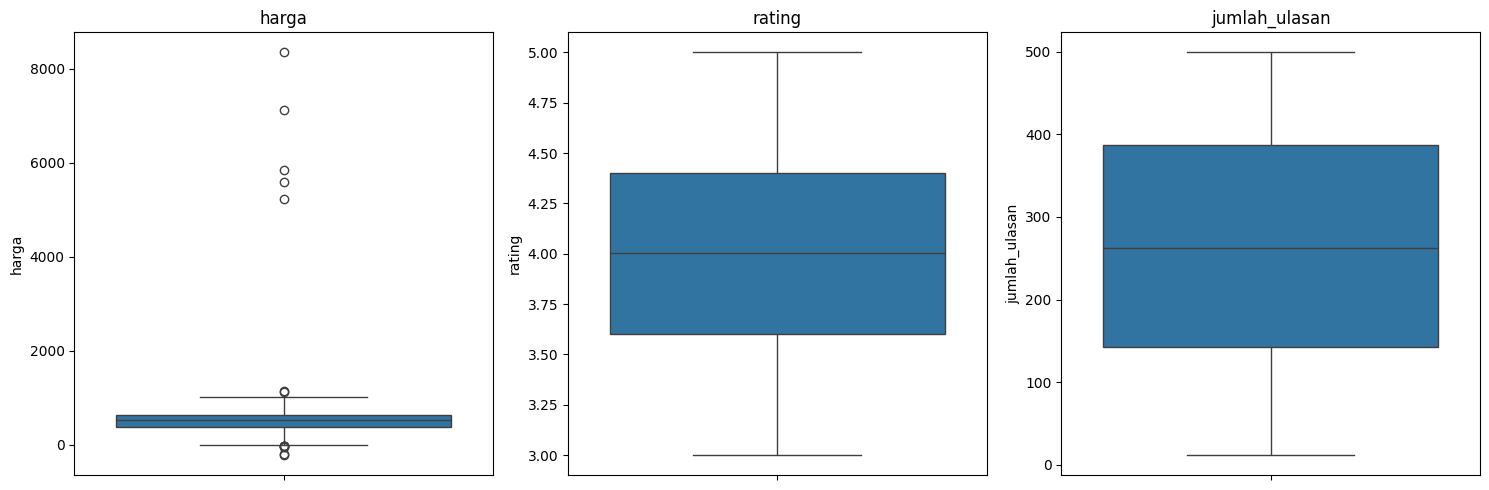

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Keterangan: Jika ada titik yang jauh dari kotak dalam boxplot, itu adalah outlier.
1. Harga

  Pada kolom harga, boxplot menunjukkan bahwa terdapat banyak outlier. Sebagian besar data berada dalam rentang yang lebih rendah (dekat dengan 0-500), tetapi ada beberapa harga yang sangat tinggi (di atas 8000) yang dianggap sebagai outlier. Artinya, harga produk dalam dataset memiliki distribusi yang right-skewed (positively skewed), dengan beberapa produk yang memiliki harga jauh lebih mahal dibandingkan mayoritas produk lainnya.
2. Rating

  Tidak ada outlier yang terlihat pada kolom ini. Rating produk cenderung terdistribusi normal, dengan sebagian besar produk memiliki rating antara 3.5 - 4.5.
3. Jumlah_ulasan

  Tidak ada outlier yang terlihat pada kolom ini. Sebaran data cukup luas, dengan median berada di sekitar 250 ulasan. Sehingga, jumlah ulasan memiliki distribusi yang cukup merata.

**2. IQR**

In [47]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


harga: 14 outliers
rating: 0 outliers
jumlah_ulasan: 0 outliers


Keterangan: Hasil output di atas menunjukkan jumlah outlier pada setiap kolom numerik. Dapat dilihat bahwa pada kolom harga terdapat 14 outlier, sedangkan pada kolom rating dan jumlah_ulasan tidak terdapat outlier.

3b. Apa dampak dari keberadaan outlier terhadap analisis?

Jawab:
Dampak dari keberadaan outlier terhadap analisis

1. Mengganggu mean. Jika ada nilai yang sangat besar/kecil, mean bisa jadi tidak mewakili data.

2. Memengaruhi model prediktif. Model regresi bisa bias karena outlier.

3. Mengubah distribusi data. Distribusi bisa menjadi skewed, sehingga pemilihan metode analisis harus disesuaikan.

**Penanganan Outlier**

Berdasarkan jumlah dan dampak outlier, ada beberapa metode yang bisa digunakan:

📌 A. Winsorizing (Mengganti Outlier dengan Batas IQR)

Alasan: Jika data penting dan tidak boleh dihapus, kita bisa mengganti outlier dengan batas kuartil.

📌 B. Menghapus Outlier (Jika Jumlahnya Sedikit dan Tidak Signifikan)

Alasan: Jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data, bisa dihapus.
nb. hal ini tidak akan kita lakukan karena bisa mempengaruhi dimensi data


 3c.  Pilih metode yang sesuai untuk menangani outlier dan jelaskan alasan pemilihannya.

 Jawab:

 Metode yang dipilih adalah Metode Winsorizing. Berikut ini alasan pemilihan Metode Winsorizing.
 1. Outlier pada harga cukup banyak (14 data), jadi penghapusan tidak disarankan. Menghapus outlier bisa mengurangi informasi penting dalam data.
 2. Harga merupakan variabel numerik kontinu yang mungkin memiliki nilai ekstrem alami (contoh: produk premium yang memang mahal).
 3. Winsorizing membantu menjaga distribusi tetap stabil tanpa menghilangkan terlalu banyak data.


 3d. Menangani outlier dengan metode yang sesuai.

 Jawab:

 Berikut ini penanganan outlier dengan menggunakan metode winsorizing:

📌 **A. Winsorizing (Mengganti Outlier dengan Batas IQR)**

In [48]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

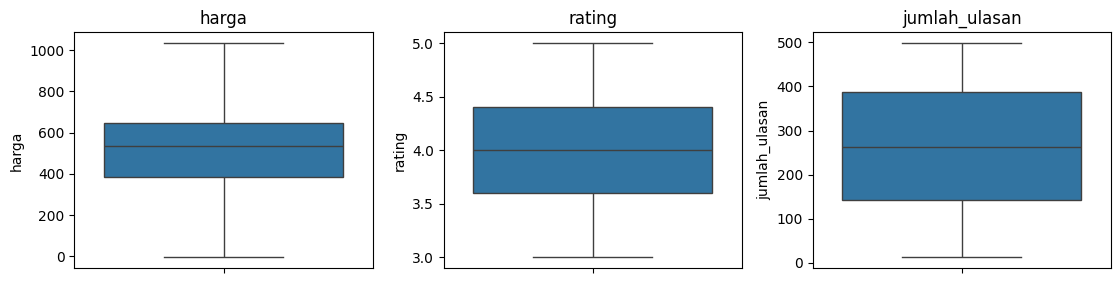

In [50]:
#cek boxplot lagi

num_cols = ['harga','rating','jumlah_ulasan']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Keterangan: Berdasarkan hasil output di atas, sudah tidak terdapat outlier pada kolom harga. Untuk kolom rating dan jumlah_ulasan boleh tidak dilakukan penanganan outlier karena pada kedua kolom tersebut tidak terdapat outlier.

# ENCODING DATA KATEGORIK

Encoding adalah proses mengubah data kategorik menjadi bentuk numerik agar dapat digunakan dalam algoritma Machine Learning. Model Machine Learning umumnya hanya dapat bekerja dengan angka, sehingga data kategorik harus dikonversi terlebih dahulu sebelum digunakan dalam pemodelan.



4a. Tentukan kolom mana yang memerlukan encoding.

Jawab:

Kolom yang memerlukan encoding adalah kolom produk_id, nama_produk, kategori, dan negara_asal. Karena kolom-kolom tersebut berisi data yang berbentuk kategorik.

🔹**Metode Encoding dalam Machine Learning**
Ada beberapa metode encoding yang umum digunakan, tergantung pada jenis dan karakteristik data kategorik:

1. One-Hot Encoding (OHE): Mengubah kategori menjadi beberapa kolom biner (0/1). Digunakan jika jumlah kategori tidak terlalu banyak (menghindari dimensionalitas tinggi) hal ini akan menambah dimensi kolom data.
2. Ordinal Encoding	: Mengubah kategori menjadi angka berurutan (0,1,2,..). Digunakan jika kategori memiliki urutan yang jelas (misalnya pendidikan: SD < SMP < SMA)
3. Target Encoding	: Menggunakan rata-rata target (misalnya rata-rata skor IMDB berdasarkan negara) untuk mengganti kategori. Digunakan jika data memiliki hubungan statistik yang kuat dengan target.


In [51]:
#melihat isi dalam kolom
data['produk_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [52]:
data['nama_produk'].unique()

array(['Produk_1', 'Produk_2', 'Produk_3', 'Produk_4', 'Produk_5',
       'Produk_6', 'Produk_7', 'Produk_8', 'Produk_9', 'Produk_10',
       'Produk_11', 'Produk_12', 'Produk_13', 'Produk_14', 'Produk_15',
       'Produk_16', 'Produk_17', 'Produk_18', 'Produk_19', 'Produk_20',
       'Produk_21', 'Produk_22', 'Produk_23', 'Produk_24', 'Produk_25',
       'Produk_26', 'Produk_27', 'Produk_28', 'Produk_29', 'Produk_30',
       'Produk_31', 'Produk_32', 'Produk_33', 'Produk_34', 'Produk_35',
       'Produk_36', 'Produk_37', 'Produk_38', 'Produk_39', 'Produk_40',
       'Produk_41', 'Produk_42', 'Produk_43', 'Produk_44', 'Produk_45',
       'Produk_46', 'Produk_47', 'Produk_48', 'Produk_49', 'Produk_50',
       'Produk_51', 'Produk_52', 'Produk_53', 'Produk_54', 'Produk_55',
       'Produk_56', 'Produk_57', 'Produk_58', 'Produk_59', 'Produk_60',
       'Produk_61', 'Produk_62', 'Produk_63', 'Produk_64', 'Produk_65',
       'Produk_66', 'Produk_67', 'Produk_68', 'Produk_69', 'Produk_70',
 

In [53]:
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

In [54]:
data['negara_asal'].unique()

array(['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK'], dtype=object)

🔹 **Memilih Metode Encoding yang Cocok untuk Data**
Pada dataset ini, terdapat empat kolom kategorik:
1. produk_id : berisi identifikasi unik setiap produk.
2. nama_produk : berisi nama produk.
3. kategori : berisi kategori produk.
4. negara_asal : berisi negara asal produk.

 4b. Bandingkan berbagai metode encoding dan pilih metode yang paling sesuai untuk setiap kolom. Jelaskan alasan pemilihan metode tersebut.

Jawab:

 **produk_id**  

Kolom ini bersifat sebagai identifier unik, bukan fitur untuk model. Jadi, tidak perlu diubah menjadi angka atau kategori lain.

**nama_produk**
Nama produk adalah teks unik untuk setiap produk, sehingga tidak relevan untuk encoding. Jika ingin menggunakannya, bisa diekstrak fitur tambahan seperti panjang nama atau kata kunci tertentu.

**kategori**
Metode yang cocok digunakan adalah One-Hot Encoding (OHE), karena kategori tidak memiliki urutan tertentu (yaitu: "Laptop", "Smartphone", "Aksesoris"). Sehingga One-Hot Encoding (OHE) lebih cocok untuk digunakan.

**negara_asal**
Jumlah negara tidak terlalu banyak. Sehingga, metode yang cocok digunakan adalah One-Hot Encoding (OHE)



**Kategori**

In [73]:
# Data kategori
data = pd.DataFrame({'kategori': ['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera', 'Smartphone']})

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['kategori'], prefix='kategori').astype(int)

# Menampilkan hasil
print(data_encoded)

   kategori_Camera  kategori_Headphone  kategori_Laptop  kategori_Smartphone  \
0                0                   0                0                    0   
1                0                   1                0                    0   
2                0                   0                0                    0   
3                0                   0                1                    0   
4                1                   0                0                    0   
5                0                   0                0                    1   

   kategori_Smartwatch  kategori_Tablet  
0                    1                0  
1                    0                0  
2                    0                1  
3                    0                0  
4                    0                0  
5                    0                0  


In [74]:
print(data['kategori'].head())

0    Smartwatch
1     Headphone
2        Tablet
3        Laptop
4        Camera
Name: kategori, dtype: object


In [75]:
data['kategori'].unique()

array(['Smartwatch', 'Headphone', 'Tablet', 'Laptop', 'Camera',
       'Smartphone'], dtype=object)

Interpretasi Baris:
1. Baris 0 → kategori_Smartwatch = 1.
Produk ini adalah Smartwatch.
2. Baris 1 → kategori_Headphone = 1.
Produk ini adalah Headphone.
3. Baris 2 → kategori_Tablet = 1.
Produk ini adalah Tablet.
4. Baris 3 → kategori_Laptop = 1.
Produk ini adalah Laptop.
5. Baris 4 → kategori_Camera = 1.
Produk ini adalah Camera.
6. Baris 5 → kategori_Smartphone = 1.
Produk ini adalah Smartphone.

**negara_asal**

In [76]:
# Data Negara Asal
data = pd.DataFrame({'negara_asal': ['Japan', 'Canada', 'South Korea', 'France', 'USA', 'Germany',
       'China', 'India', 'UK']})

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['negara_asal'], prefix='negara').astype(int)

# Menampilkan hasil
print(data_encoded)

   negara_Canada  negara_China  negara_France  negara_Germany  negara_India  \
0              0             0              0               0             0   
1              1             0              0               0             0   
2              0             0              0               0             0   
3              0             0              1               0             0   
4              0             0              0               0             0   
5              0             0              0               1             0   
6              0             1              0               0             0   
7              0             0              0               0             1   
8              0             0              0               0             0   

   negara_Japan  negara_South Korea  negara_UK  negara_USA  
0             1                   0          0           0  
1             0                   0          0           0  
2             0           

Interpretasi Data:
1. Baris 0 → negara_Japan = 1.
Negara asal dari Jepang.
2. Baris 1 → negara_China = 1.
Negara asal dari China.
3. Baris 2 → negara_South Korea = 1.
Negara asal dari Korea Selatan.
4. Baris 3 → negara_France = 1.
Negara asal dari Prancis.
5. Baris 4 → negara_USA = 1.
Negara asal dari Amerika Serikat.
6. Baris 5 → negara_Germany = 1.
Negara asal dari Jerman.
7. Baris 6 → negara_India = 1.
Negara asal dari India.
8. Baris 7 → negara_UK = 1.
Negara asal dari Inggris.

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   negara_asal  9 non-null      object
dtypes: object(1)
memory usage: 204.0+ bytes
